# 6.1.4 Generate Random Latitudes and Longitudes

### Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5 Generate Random World Cities

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

# 6.2.6 Get the City Weather Data

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | montargis
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | asfi
Processing Record 5 of Set 1 | margate
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | kindu
Processing Record 11 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 12 of Set 1 | sioux lookout
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | skjervoy
Processing Record 15 of Set 1 | kichera
Processing Record 16 of Set 1 | abalak
Processing Record 17 of Set 1 | altenholz
Processing Record 18 of Set 1 | kedrovyy
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | gravdal
Processing Record 21 of Set 1 | krasnoarmeysk
Processing Record 22 of Set 1 | olginskaya
Processing Recor

Processing Record 37 of Set 4 | katsuura
Processing Record 38 of Set 4 | honiara
Processing Record 39 of Set 4 | harboore
Processing Record 40 of Set 4 | luanda
Processing Record 41 of Set 4 | camocim
Processing Record 42 of Set 4 | luganville
Processing Record 43 of Set 4 | la roda
Processing Record 44 of Set 4 | moberly
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | la romana
Processing Record 47 of Set 4 | najran
Processing Record 48 of Set 4 | chara
Processing Record 49 of Set 4 | hofn
Processing Record 50 of Set 4 | mahebourg
Processing Record 1 of Set 5 | anchorage
Processing Record 2 of Set 5 | pueblo nuevo
Processing Record 3 of Set 5 | dire dawa
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | bengkulu
Processing Record 6 of Set 5 | aflu
City not found. Skipping...
Processing Record 7 of Set 5 | hoa binh
Processing Record 8 of Set 5 | fairbanks
Processing Record 9 of Set 5 | faanui
Processing Record 10 of Set 5 | lermontovka
Proces

Processing Record 20 of Set 8 | aljezur
Processing Record 21 of Set 8 | xining
Processing Record 22 of Set 8 | zaterechnyy
Processing Record 23 of Set 8 | quatre cocos
Processing Record 24 of Set 8 | karaul
City not found. Skipping...
Processing Record 25 of Set 8 | gamboma
Processing Record 26 of Set 8 | black river
Processing Record 27 of Set 8 | hurghada
Processing Record 28 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 29 of Set 8 | koumac
Processing Record 30 of Set 8 | todos santos
Processing Record 31 of Set 8 | ochakiv
Processing Record 32 of Set 8 | tucupita
Processing Record 33 of Set 8 | venezuela
Processing Record 34 of Set 8 | heilbron
Processing Record 35 of Set 8 | puerto baquerizo moreno
Processing Record 36 of Set 8 | waynesville
Processing Record 37 of Set 8 | yuanping
Processing Record 38 of Set 8 | bayeux
Processing Record 39 of Set 8 | torbay
Processing Record 40 of Set 8 | tiksi
Processing Record 41 of Set 8 | chester
Processing Record 42 o

Processing Record 8 of Set 12 | vaasa
Processing Record 9 of Set 12 | matara
Processing Record 10 of Set 12 | kitangari
Processing Record 11 of Set 12 | touros
Processing Record 12 of Set 12 | tikapur
Processing Record 13 of Set 12 | portobelo
Processing Record 14 of Set 12 | oranjemund
Processing Record 15 of Set 12 | nandu
Processing Record 16 of Set 12 | antananarivo
Processing Record 17 of Set 12 | sambava
Processing Record 18 of Set 12 | tarakan
Processing Record 19 of Set 12 | ganzhou
Processing Record 20 of Set 12 | maniitsoq
Processing Record 21 of Set 12 | jaciara
Processing Record 22 of Set 12 | sawtell
Processing Record 23 of Set 12 | semnan
Processing Record 24 of Set 12 | maldonado
Processing Record 25 of Set 12 | selty
Processing Record 26 of Set 12 | ejura
Processing Record 27 of Set 12 | macaboboni
City not found. Skipping...
Processing Record 28 of Set 12 | ostrovnoy
Processing Record 29 of Set 12 | fereydun kenar
Processing Record 30 of Set 12 | huilong
Processing Rec

In [9]:
len(city_data)

554

# 6.2.7 Create a DataFrame of City Weather Data

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Montargis,47.83,2.75,54.00,93,100,9.89,FR,2020-10-01 19:38:51
1,Mataura,-46.19,168.86,48.99,68,50,7.00,NZ,2020-10-01 19:38:51
2,Busselton,-33.65,115.33,55.99,85,95,10.83,AU,2020-10-01 19:38:52
3,Asfi,32.30,-9.24,67.15,83,0,16.91,MA,2020-10-01 19:38:52
4,Margate,51.38,1.39,55.99,82,100,1.01,GB,2020-10-01 19:38:52
5,Ushuaia,-54.80,-68.30,28.40,92,75,16.11,AR,2020-10-01 19:36:54
6,Khatanga,71.97,102.50,30.00,99,100,21.99,RU,2020-10-01 19:38:52
7,Fortuna,40.60,-124.16,71.60,60,20,4.70,US,2020-10-01 19:38:52
8,Punta Arenas,-53.15,-70.92,35.60,55,40,17.22,CL,2020-10-01 19:35:32
9,Kindu,-2.95,25.95,71.19,95,100,2.82,CD,2020-10-01 19:38:53


In [11]:
city_data_new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[city_data_new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Montargis,FR,2020-10-01 19:38:51,47.83,2.75,54.00,93,100,9.89
1,Mataura,NZ,2020-10-01 19:38:51,-46.19,168.86,48.99,68,50,7.00
2,Busselton,AU,2020-10-01 19:38:52,-33.65,115.33,55.99,85,95,10.83
3,Asfi,MA,2020-10-01 19:38:52,32.30,-9.24,67.15,83,0,16.91
4,Margate,GB,2020-10-01 19:38:52,51.38,1.39,55.99,82,100,1.01
...,...,...,...,...,...,...,...,...,...
549,Mahon,ES,2020-10-01 19:41:01,39.89,4.27,71.60,83,20,11.41
550,Belyy Yar,RU,2020-10-01 19:41:01,53.60,91.39,35.60,95,94,6.71
551,Westport,US,2020-10-01 19:39:49,41.14,-73.36,73.40,49,20,13.87
552,Maloy,NO,2020-10-01 19:41:02,61.94,5.11,62.60,51,49,19.46


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/01/20'

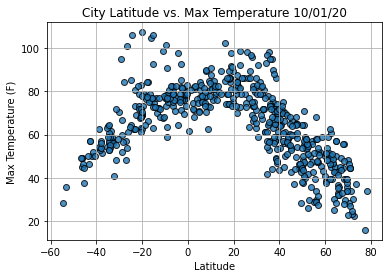

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

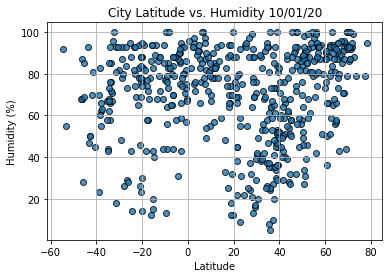

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

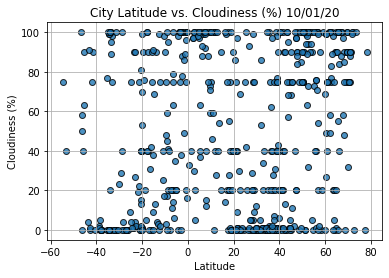

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed


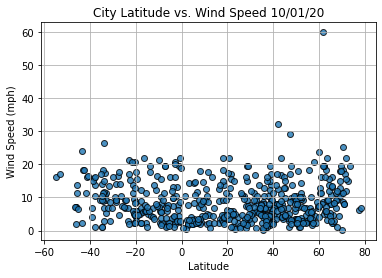

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [41]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [42]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

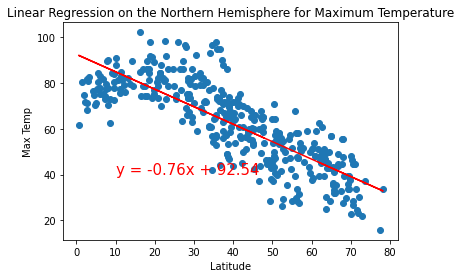

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

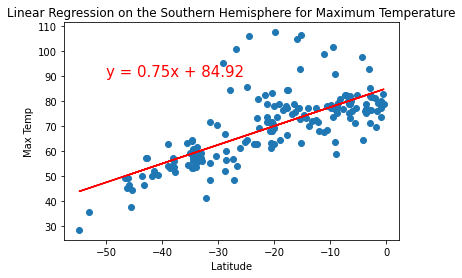

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

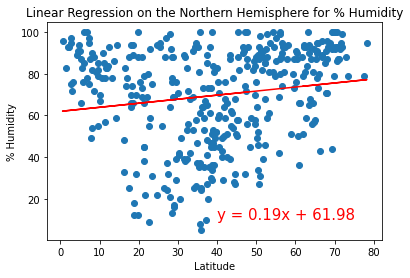

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

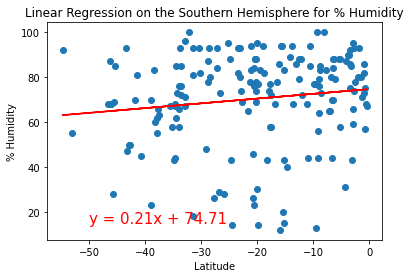

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

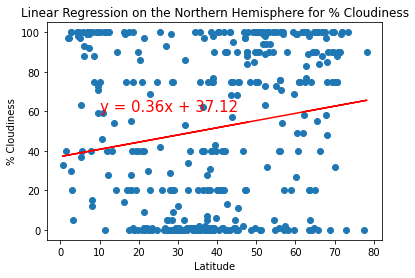

In [65]:
# Refactor the code we have been using for linear regression lines and plots to create the x- and y-values 
# for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the plot_linear_regression function with the correct arguments to create the linear regression line 
# and plot for percent cloudiness in the Northern Hemisphere. It should look like the following plot. 
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,60))

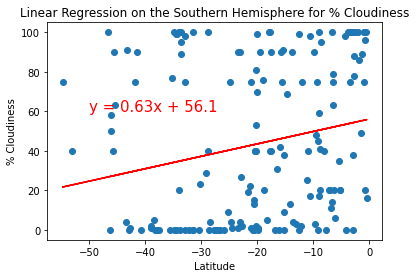

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

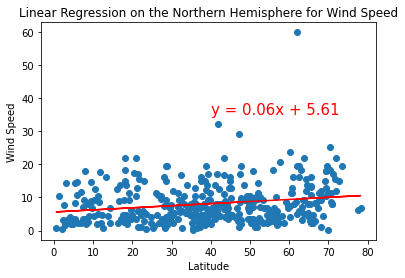

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

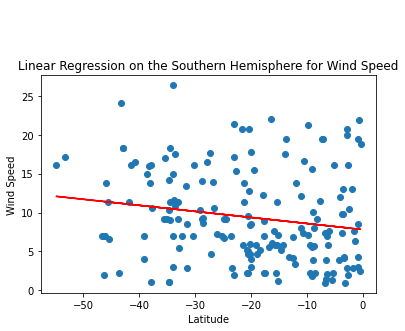

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))